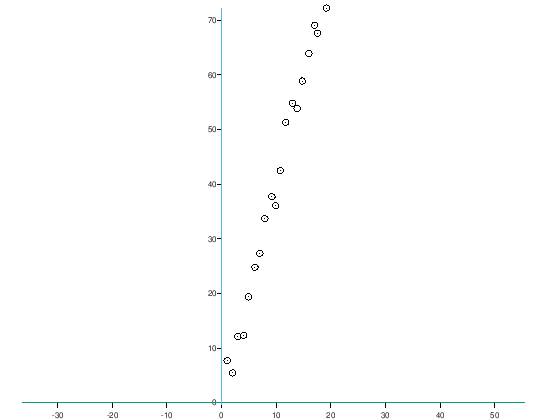

In [1]:
clear, clc, close all

#rng(0)
data = load('test.mat');
data = data.data;

#data(:,1) = randn(30,1);
#data(:,2) = 3.4 + 1.2 * data(:,1);
#data(:,2) = data(:,2) + 0.2*randn(size(data(:,1)));
#data = sortrows(data,1);

figure
axes('LineWidth',0.6,...
    'FontName','Helvetica',...
    'FontSize',8,...
    'XAxisLocation','Origin',...
    'YAxisLocation','Origin');
line(data(:,1),data(:,2),...
    'LineStyle','None',...
    'Marker','o');
axis equal

Step 1

First we have to mean center the data, i.e. substract the univariate means from the two columns, i.e. the two variables of data. In the following steps we therefore study the deviations from the mean(s) only.

In [2]:
data(:,1) = data(:,1)-mean(data(:,1));
data(:,2) = data(:,2)-mean(data(:,2));

Step 2

Next we calculate the covariance matrix of data. The covariance matrix contains all necessary information to rotate the coordinate system.

In [3]:
C = cov(data)

C =

    34.434   135.768
   135.768   540.935



Step 3

The rotation helps to create new variables which are uncorrelated, i.e. the covariance is zero for all pairs of the new variables. The decorrelation is achieved by diagonalizing the covariance matrix C. The eigenvectors V belonging to the diagonalized covariance matrix are a linear combination of the old base vectors, thus expressing the correlation between the old and the new time series. We find the eigenvalues of the covariance matrix C by solving the equation

In [4]:
[V,D] = eig(C)

V =

  -0.96988   0.24358
   0.24358   0.96988

D =

Diagonal Matrix

     0.33676           0
           0   575.03236



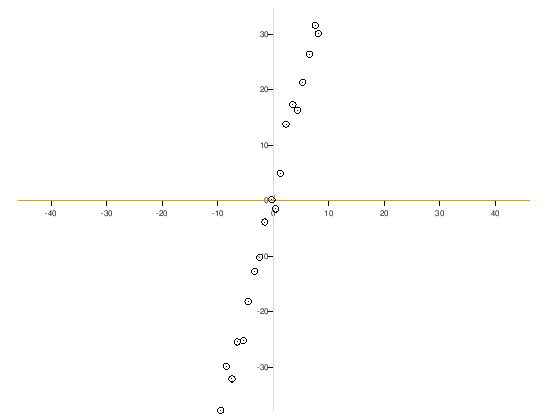

In [5]:
figure
axes('LineWidth',0.6,...
    'FontName','Helvetica',...
    'FontSize',8,...
    'XAxisLocation','Origin',...
    'YAxisLocation','Origin');
line(data(:,1),data(:,2),...
    'LineStyle','None',...
    'Marker','o');
line([0 V(1,1)],[0 V(2,1)],...
    'Color',[0.8 0.5 0.3],...
    'LineWidth',0.75);
line([0 V(1,2)],[0 V(2,2)],...
    'Color',[0.8 0.5 0.3],...
    'LineWidth',0.75);
axis equal

Step 4

Calculating the data set in the new coordinate system. We need to flip newdata left/right since the second column is the one with the larges eigenvalue.

In [6]:
newdata = V * data';
newdata = newdata';
#newdata = fliplr(newdata)

In [7]:
var(newdata)
var(newdata)/sum(var(newdata))

ans =

     0.33676   575.03236

ans =

   5.8530e-04   9.9941e-01



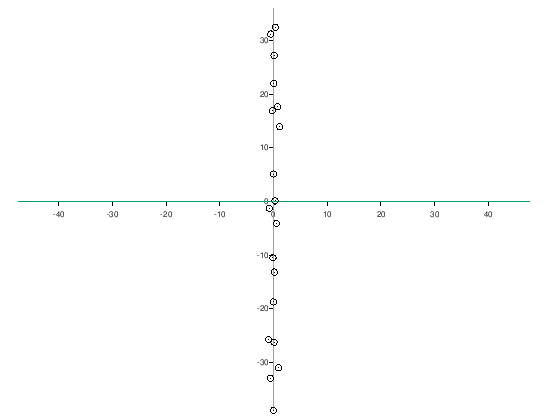

In [8]:
figure
axes('LineWidth',0.6,...
    'FontName','Helvetica',...
    'FontSize',8,...
    'XAxisLocation','Origin',...
    'YAxisLocation','Origin')
line(newdata(:,1),newdata(:,2),...
    'LineStyle','None',...
    'Marker','o');
axis equal

In [9]:
pkg load statistics
[coeff,newdata,latend,tsd] = princomp(data);
newdata
tsd

newdata =

  -38.925301    0.028839
  -30.983931   -0.921192
  -32.921777    0.609487
  -26.228334   -0.095116
  -25.740729    0.921431
  -18.720956    0.039512
  -13.157022   -0.135039
  -10.474653    0.121063
   -4.089838   -0.538816
    0.113548   -0.272989
   -1.305514    0.800293
    5.111671    0.029613
   13.921625   -1.120338
   17.650685   -0.766548
   16.891796    0.257705
   21.988106   -0.041657
   27.187760   -0.095949
   32.470741   -0.333828
   31.179252    0.531050
   36.032872    0.982481

tsd =

   2.637415
   4.189353
   2.987919
   1.223190
   3.673438
   0.614122
   0.355189
   0.234325
   0.891191
   0.221316
   1.904814
   0.048044
   4.064193
   2.286635
   0.693410
   0.845935
   1.312786
   2.164468
   2.528024
   5.124235



In [10]:
corrcoef(newdata)

ans =

   1.0000e+00  -2.0962e-15
  -2.0962e-15   1.0000e+00

